In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Q1: RGB to Grayscale

In [2]:
image = cv2.imread('kobe.jpg')

##### matplotlib use RGB representation instead of BGR used by opencv
- we define a function to show rgb image easily

In [3]:
def showrgb(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

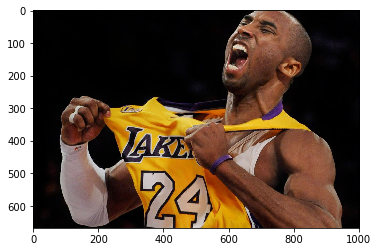

In [4]:
showrgb(image)

In [5]:
res = np.zeros(image.shape[:2],np.uint8)

In [6]:
res.shape

(668, 1002)

In [7]:
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        res[i][j] = (int(image[i][j][0]) + int(image[i][j][1]) +  int(image[i][j][2])) / 3

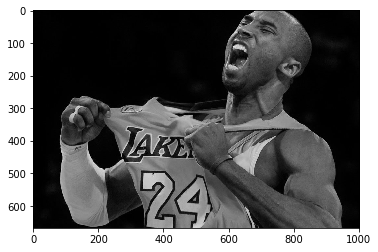

In [8]:
showrgb(res)

# Q2: Nearest neighbour interpolation

In [9]:
iu = cv2.imread('IU.png')

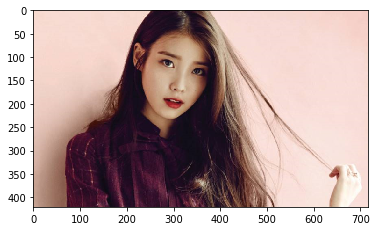

In [10]:
showrgb(iu)

In [11]:
iu_res = np.zeros((iu.shape[0]*3,iu.shape[1]*3,3),np.uint8)

In [12]:
for i in range(iu_res.shape[0]):
    for j in range(iu_res.shape[1]):
        for k in range(iu_res.shape[2]):
            iu_res[i][j][k] = iu[int(i/3)][int(j/3)][k]

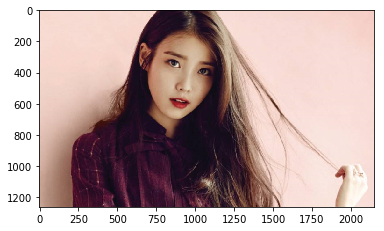

In [13]:
showrgb(iu_res)

# Q3: Bilinear interpolation

In [14]:
iu_res2 = np.zeros((int(iu.shape[0]*0.7),int(iu.shape[1]*0.7),3),np.uint8)

In [15]:
for i in range(iu_res2.shape[0]):
    for j in range(iu_res2.shape[1]):
        for k in range(iu_res2.shape[2]):
            x = i/0.7
            y = j/0.7
            y1 = int(np.ceil(y))
            y2 = int(np.floor(y))
            x1 = int(np.floor(x))
            x2 = int(np.ceil(x))
            if x == x1:
                bottom = iu[x1][y1][k]
                top = iu[x1][y2][k]
            else:
                bottom = ((x2-x)/(x2-x1)*iu[x1][y1][k])+((x-x1)/(x2-x1)*iu[x2][y1][k])
                top = ((x2-x)/(x2-x1)*iu[x1][y2][k])+((x-x1)/(x2-x1)*iu[x2][y2][k])
            if y == y1:
                iu_res2[i][j][k] = top
            else:
                iu_res2[i][j][k] = ((y2-y)/(y2-y1)*bottom)+((y-y1)/(y2-y1)*top)

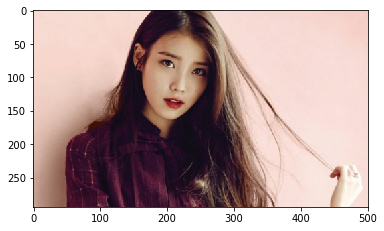

In [16]:
showrgb(iu_res2)

In [17]:
print(iu.shape)
print(iu_res.shape)
print(iu_res2.shape)

(421, 717, 3)
(1263, 2151, 3)
(294, 501, 3)


# Save results to file

In [19]:
cv2.imwrite('kobe_grayscale.jpg',res)
cv2.imwrite('iu_enlarged_nn.jpg',iu_res)
cv2.imwrite('iu_reduced_bilinear.jpg',iu_res2)

True